In [1]:
import requests
import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\Jason\Documents\\Python\\Stock Market Prediction\\Crypto\\ETHUSD2.CSV', nrows=2500)
df.tail(3)

,id,trade_px,trade_volume,b1,b2,b3,b4,b5,b6,b7,...,aq24,aq25,aq26,aq27,aq28,aq29,aq30,order_date_time,trades_date_time,update_type
2497,4966,294.10,0.050000,293.99,293.91,293.77,293.75,293.73,293.61,293.49,...,6.21894,0.0175,0.100612,12.0,0.0175,0.100612,0.01,20170918 07:11:09.725781,20170918 07:11:10.007027,2
2498,4967,294.14,0.509965,293.99,293.91,293.77,293.75,293.73,293.61,293.49,...,6.21894,0.0175,0.100612,12.0,0.0175,0.100612,0.01,20170918 07:11:09.725781,20170918 07:11:10.022653,2
2499,4968,294.15,0.017500,293.99,293.91,293.77,293.75,293.73,293.61,293.49,...,6.21894,0.0175,0.100612,12.0,0.0175,0.100612,0.01,20170918 07:11:09.725781,20170918 07:11:10.038279,2


In [3]:
df.index = pd.to_datetime(df['order_date_time'])
df=df.drop(df.index[:1])
resample = df.resample('s').mean()
resample=resample.interpolate(method='linear')
#resample=resample.drop(resample.index[:1])
resample.head()

,id,trade_px,trade_volume,b1,b2,b3,b4,b5,b6,b7,...,aq22,aq23,aq24,aq25,aq26,aq27,aq28,aq29,aq30,update_type
order_date_time,,,,,,,,,,,,,,,,,,,,,
2017-09-18 06:42:15,4.50,145.465000,0.143244,290.63,290.600,290.51,290.50,290.49,290.38,290.33,...,0.075,8.010000,0.101664,0.058900,5.496297,0.11100,8.011900,11.3000,31.744415,1.500000
2017-09-18 06:42:16,6.00,290.930000,0.286487,290.94,290.620,290.60,290.51,290.50,290.49,290.48,...,8.010,0.101664,0.058900,5.496297,38.560336,0.11100,8.011900,11.3000,31.744415,1.000000
2017-09-18 06:42:17,7.50,290.883333,1.128718,290.93,290.645,290.63,290.57,290.55,290.51,290.49,...,8.005,19.331000,0.066950,6.753148,19.331000,0.08495,6.754098,5.7055,19.878157,1.333333
2017-09-18 06:42:18,9.00,290.836667,1.970948,290.92,290.670,290.66,290.63,290.60,290.53,290.50,...,8.000,38.560336,0.075000,8.010000,0.101664,0.05890,5.496297,0.1110,8.011900,1.666667
2017-09-18 06:42:19,14.25,290.695000,2.017940,290.60,290.530,290.50,290.49,290.48,290.38,290.36,...,0.075,8.010000,0.101664,0.058900,5.496297,0.11100,8.011900,11.3000,31.744415,1.750000


In [4]:
def detect_peaks(x, mph=None, mpd=1, threshold=0, edge='rising',
                 kpsh=False, valley=False, show=True, ax=None):

    x = np.atleast_1d(x).astype('float64')
    if x.size < 3:
        return np.array([], dtype=int)
    if valley:
        x = -x
    # find indices of all peaks
    dx = x[1:] - x[:-1]
    # handle NaN's
    indnan = np.where(np.isnan(x))[0]
    if indnan.size:
        x[indnan] = np.inf
        dx[np.where(np.isnan(dx))[0]] = np.inf
    ine, ire, ife = np.array([[], [], []], dtype=int)
    if not edge:
        ine = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) > 0))[0]
    else:
        if edge.lower() in ['rising', 'both']:
            ire = np.where((np.hstack((dx, 0)) <= 0) & (np.hstack((0, dx)) > 0))[0]
        if edge.lower() in ['falling', 'both']:
            ife = np.where((np.hstack((dx, 0)) < 0) & (np.hstack((0, dx)) >= 0))[0]
    ind = np.unique(np.hstack((ine, ire, ife)))
    # handle NaN's
    if ind.size and indnan.size:
        # NaN's and values close to NaN's cannot be peaks
        ind = ind[np.in1d(ind, np.unique(np.hstack((indnan, indnan - 1, indnan + 1))), invert=True)]
    # first and last values of x cannot be peaks
    if ind.size and ind[0] == 0:
        ind = ind[1:]
    if ind.size and ind[-1] == x.size - 1:
        ind = ind[:-1]
    # remove peaks < minimum peak height
    if ind.size and mph is not None:
        ind = ind[x[ind] >= mph]
    # remove peaks - neighbors < threshold
    if ind.size and threshold > 0:
        #dx = np.min(np.vstack([x[ind] - x[ind - 1], x[ind] - x[ind + 1]]), axis=0)
        dx = abs(x[ind] - x[ind - 1])
        ind = np.delete(ind, np.where(dx < threshold)[0])
    # detect small peaks closer than minimum peak distance
    if ind.size and mpd > 1:
        ind = ind[np.argsort(x[ind])][::-1]  # sort ind by peak height
        idel = np.zeros(ind.size, dtype=bool)
        for i in range(ind.size):
            if not idel[i]:
                # keep peaks with the same height if kpsh is True
                idel = idel | (ind >= ind[i] - mpd) & (ind <= ind[i] + mpd) \
                              & (x[ind[i]] > x[ind] if kpsh else True)
                idel[i] = 0  # Keep current peak
        # remove the small peaks and sort back the indices by their occurrence
        ind = np.sort(ind[~idel])

    if show:
        if indnan.size:
            x[indnan] = np.nan
        if valley:
            x = -x
        _plot(x, mph, mpd, threshold, edge, valley, ax, ind)

    return ind


def _plot(x, mph, mpd, threshold, edge, valley, ax, ind):
    """Plot results of the detect_peaks function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            _, ax = plt.subplots(1, 1, figsize=(18, 6))

        ax.plot(x, 'b', lw=1)
        if ind.size:
            label = 'valley' if valley else 'peak'
            label = label + 's' if ind.size > 1 else label
            ax.plot(ind, x[ind], '.', mfc=None, mec='r', mew=2, ms=2,
                    label='%d %s' % (ind.size, label))
            ax.legend(loc='best', framealpha=.5, numpoints=1)
        ax.set_xlim(-.02 * x.size, x.size * 1.02 - 1)
        ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
        yrange = ymax - ymin if ymax > ymin else 1
        ax.set_ylim(ymin - 0.1 * yrange, ymax + 0.1 * yrange)
        ax.set_xlabel('Data #', fontsize=14)
        ax.set_ylabel('Amplitude', fontsize=14)
        mode = 'Valley detection' if valley else 'Peak detection'
        ax.set_title("%s (mph=%s, mpd=%d, threshold=%s, edge='%s')"
                     % (mode, str(mph), mpd, str(threshold), edge))
        # plt.grid()


In [5]:
gdaxArray=resample['trade_px'].values
gdaxArray=gdaxArray[1:]

In [6]:
gdaxRev = gdaxArray[::-1]
gdaxRev

array([ 294.051     ,  294.        ,  294.        , ...,  290.83666667,
        290.88333333,  290.93      ])

In [7]:

peaks= detect_peaks(gdaxArray,mpd=5,edge = 'both', threshold = .01, show = False)
peaks
#_plot(gdaxArray, mph=0.05, mpd=1, threshold = 0.01, valley = False, ind 
#ax=None, threshold = .01, show = True )


array([   5,   14,   37,   52,   63,   74,   99,  131,  168,  218,  260,
        277,  352,  361,  381,  391,  398,  408,  469,  475,  497,  507,
        527,  632,  724,  736,  845,  851,  873,  882,  898,  920,  959,
        975,  989,  995, 1007, 1017, 1052, 1074, 1134, 1179, 1230, 1243,
       1271, 1297, 1306, 1315, 1334, 1349, 1363, 1414, 1441, 1455, 1501,
       1510, 1525, 1569, 1575, 1587, 1622, 1654, 1666, 1696], dtype=int64)

In [8]:
valleys= detect_peaks(gdaxArray,mpd=10, threshold = .01, valley = True, edge = 'both', show = False)
#peaks
#_plot(gdaxArray, mph=0.05, mpd=1, threshold = 0.01, valley = False, ind 
#ax=None, threshold = .01, show = True )


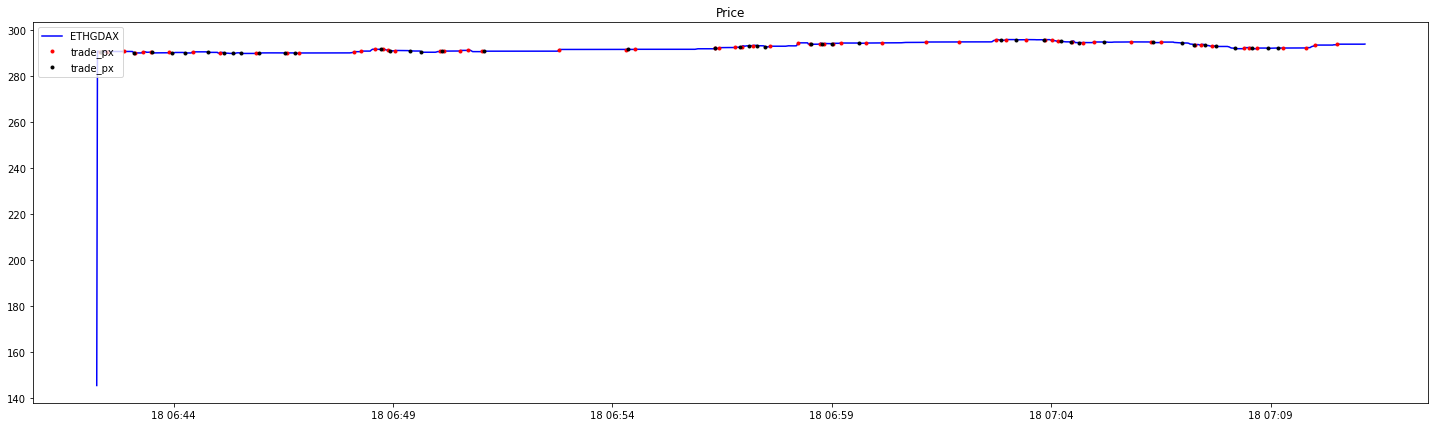

In [9]:
plt.figure(figsize=(25,7))
plt.plot(resample['trade_px'],label='ETHGDAX',color='b')
plt.plot(resample['trade_px'].iloc[peaks], linestyle='', marker='o',markersize=3, color='r')
plt.plot(resample['trade_px'].iloc[valleys], linestyle='', marker='o',markersize=3, color='black')
#plt.xlim([1, 5000])
#plt.ylim([1000, 1120])
#df.iloc[indices]
plt.title('Price')
plt.legend(loc='upper left')
plt.show()

In [10]:
Rvalleys= detect_peaks(gdaxRev,mpd=5, threshold = .01, valley = True, edge = 'rising', show = False)
Rpeaks= detect_peaks(gdaxRev,mpd=5,edge = 'both', threshold = .01, show = False)
Rvalleys

array([   1,   44,   75,   82,  132,  149,  161,  167,  211,  226,  233,
        281,  294,  322,  346,  356,  373,  401,  415,  421,  428,  438,
        467,  493,  511,  557,  602,  621,  635,  662,  684,  719,  727,
        741,  747,  753,  761,  779,  792,  816,  841,  848,  854,  863,
        873,  885,  891,  916, 1000, 1010, 1104, 1209, 1239, 1261, 1271,
       1328, 1336, 1344, 1354, 1360, 1375, 1390, 1459, 1476, 1518, 1545,
       1568, 1605, 1630, 1637, 1656, 1673, 1682, 1722, 1730], dtype=int64)

In [11]:
gdaxRev[Rvalleys][::-1]

array([ 290.695     ,  290.61      ,  290.115     ,  290.19      ,
        290.2       ,  290.25      ,  290.        ,  290.18      ,
        290.106     ,  289.95      ,  289.97      ,  290.07      ,
        290.05      ,  290.18      ,  290.73      ,  290.99      ,
        291.75111111,  291.705     ,  291.44      ,  291.08      ,
        290.49      ,  290.96035714,  291.02      ,  290.75      ,
        290.96      ,  291.68      ,  291.68      ,  291.77      ,
        292.        ,  292.13      ,  292.49      ,  292.54      ,
        292.62      ,  293.0725    ,  293.07      ,  292.84      ,
        293.11      ,  293.26      ,  294.01      ,  293.94      ,
        293.99      ,  293.99      ,  294.21272727,  294.38      ,
        294.4       ,  294.495     ,  294.58      ,  294.75      ,
        294.785     ,  294.94      ,  295.        ,  295.71      ,
        295.9       ,  295.5       ,  295.68      ,  295.18      ,
        295.092     ,  294.67      ,  294.68      ,  294.88   

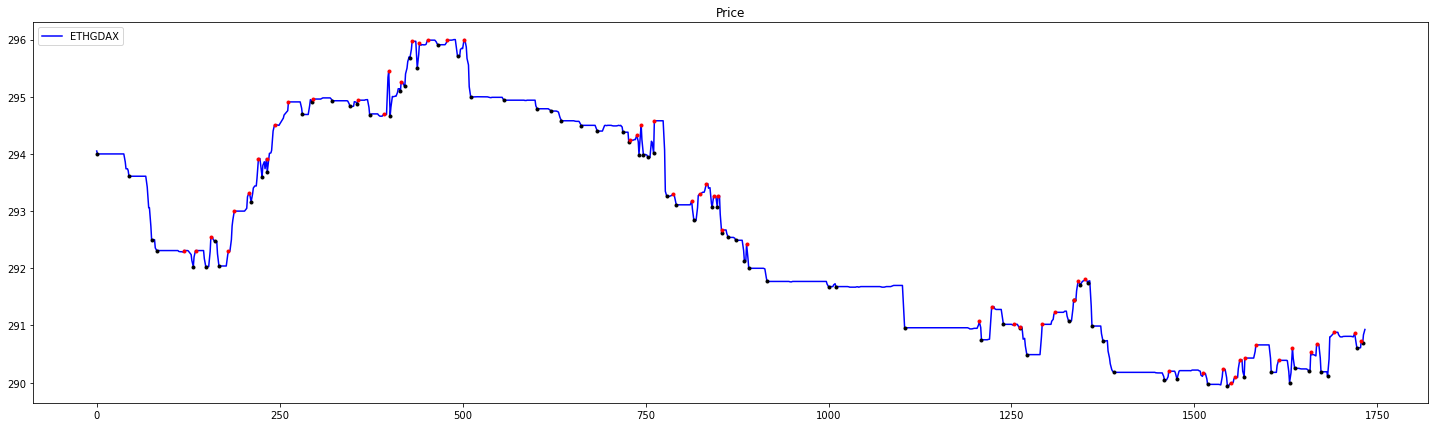

In [12]:
plt.figure(figsize=(25,7))
#data.iloc[::-1]
plt.plot(gdaxRev,label='ETHGDAX',color='b')
#plt.plot(Rvalleys[::-1], gdaxRev[Rvalleys][::-1],linestyle='',marker='o',markersize=3,color='black')
plt.plot(Rvalleys, gdaxRev[Rvalleys],linestyle='',marker='o',markersize=3,color='black')
plt.plot(Rpeaks, gdaxRev[Rpeaks],linestyle='',marker='o',markersize=3,color='red')

            #linestyle='', marker='o',markersize=3, color='black')
#plt.xlim([0, 5000])
#plt.ylim([1000, 1120])
#df.iloc[indices]
plt.title('Price')
plt.legend(loc='upper left')
plt.show()

In [13]:
valleys = (len(gdaxRev)-1)-Rvalleys
cpeaks = (len(gdaxRev)-1)-Rpeaks
cpeaks = np.append(cpeaks, peaks)
cpeaks = np.unique(cpeaks)
valleys = valleys[::-1]
cpeaks

array([   5,   14,   37,   42,   52,   63,   66,   74,   99,  118,  131,
        149,  164,  168,  171,  177,  183,  194,  218,  221,  260,  268,
        277,  352,  361,  381,  382,  391,  392,  398,  408,  423,  441,
        469,  471,  475,  480,  497,  507,  510,  527,  632,  724,  736,
        845,  851,  873,  878,  882,  884,  890,  898,  900,  909,  920,
        946,  959,  971,  975,  989,  995, 1004, 1007, 1017, 1052, 1074,
       1134, 1179, 1230, 1231, 1243, 1254, 1271, 1281, 1292, 1297, 1302,
       1306, 1315, 1317, 1334, 1340, 1349, 1363, 1376, 1414, 1438, 1441,
       1455, 1471, 1490, 1501, 1510, 1512, 1525, 1545, 1553, 1569, 1575,
       1577, 1587, 1598, 1614, 1622, 1654, 1666, 1696], dtype=int64)

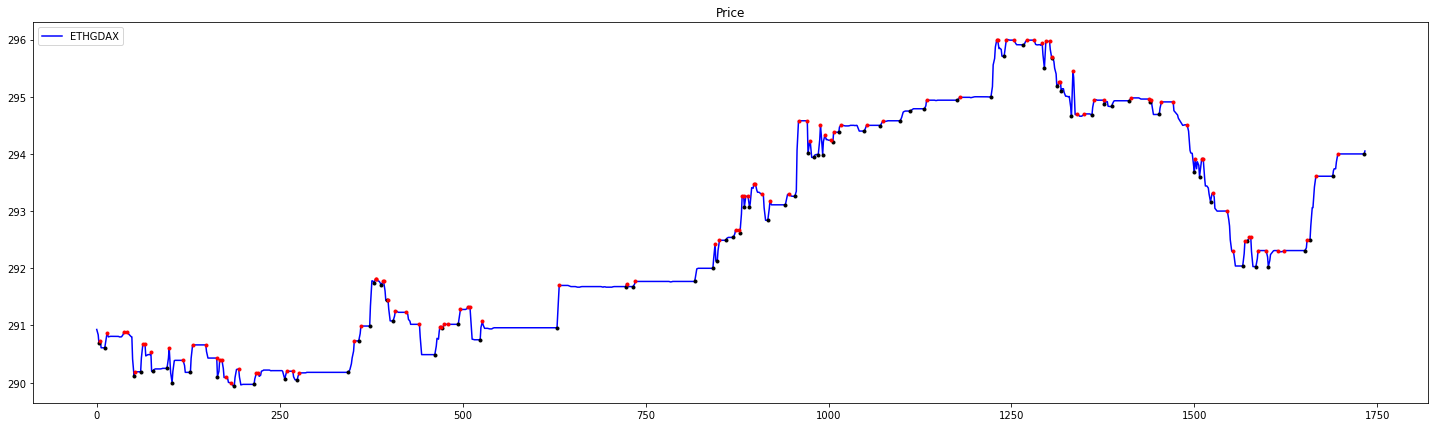

In [14]:
plt.figure(figsize=(25,7))
plt.plot(gdaxArray,label='ETHGDAX',color='b')
plt.plot(valleys, gdaxArray[valleys],linestyle='',marker='o',markersize=3,color='black')
plt.plot(cpeaks, gdaxArray[cpeaks],linestyle='',marker='o',markersize=3,color='red')

plt.title('Price')
plt.legend(loc='upper left')
plt.show()

In [15]:
len(valleys)

75

In [35]:
FinalPeakArray=[]
i = 0
HighestLocalPeak = 0
while i < len(valleys)-1:
    start = valleys[i]
    end = valleys[i+1]
    #cpeaks[valleys[i]:valleys[i+1]]
    #FinalPeaks = max(gdaxArray[cpeaks] for cpeaks in range(valleys[i],valleys[i+1]))
    for x in range(start, end):
        #while  x< len(gdaxArray):
        if gdaxArray[x] >= HighestLocalPeak:
            #FinalPeaks = np.argmax(cpeaks[start:end])
            HighestLocalPeak = gdaxArray[x]
            LocalPeakPos = x
         #break
    FinalPeakArray.append(LocalPeakPos)        
    HighestLocalPeak = 0
    i+=1

valleys

array([   3,   11,   51,   60,   77,   96,  103,  128,  165,  188,  215,
        257,  274,  343,  358,  373,  379,  389,  397,  405,  462,  472,
        494,  524,  629,  723,  733,  817,  842,  848,  860,  870,  879,
        885,  892,  917,  941,  954,  972,  980,  986,  992, 1006, 1014,
       1049, 1071, 1098, 1112, 1131, 1176, 1222, 1240, 1266, 1295, 1305,
       1312, 1318, 1332, 1360, 1377, 1387, 1411, 1439, 1452, 1500, 1507,
       1522, 1566, 1572, 1584, 1601, 1651, 1658, 1689, 1732], dtype=int64)

In [33]:
FinalPeakArray

[5,
 42,
 59,
 66,
 95,
 99,
 118,
 149,
 171,
 194,
 236,
 268,
 342,
 352,
 372,
 377,
 382,
 392,
 398,
 410,
 471,
 493,
 510,
 527,
 644,
 724,
 816,
 841,
 845,
 859,
 869,
 878,
 884,
 890,
 900,
 920,
 946,
 971,
 975,
 985,
 989,
 995,
 1013,
 1038,
 1069,
 1097,
 1111,
 1130,
 1175,
 1221,
 1231,
 1245,
 1281,
 1302,
 1306,
 1317,
 1321,
 1334,
 1364,
 1381,
 1410,
 1424,
 1441,
 1471,
 1501,
 1512,
 1525,
 1571,
 1577,
 1598,
 1650,
 1657,
 1688,
 1731]

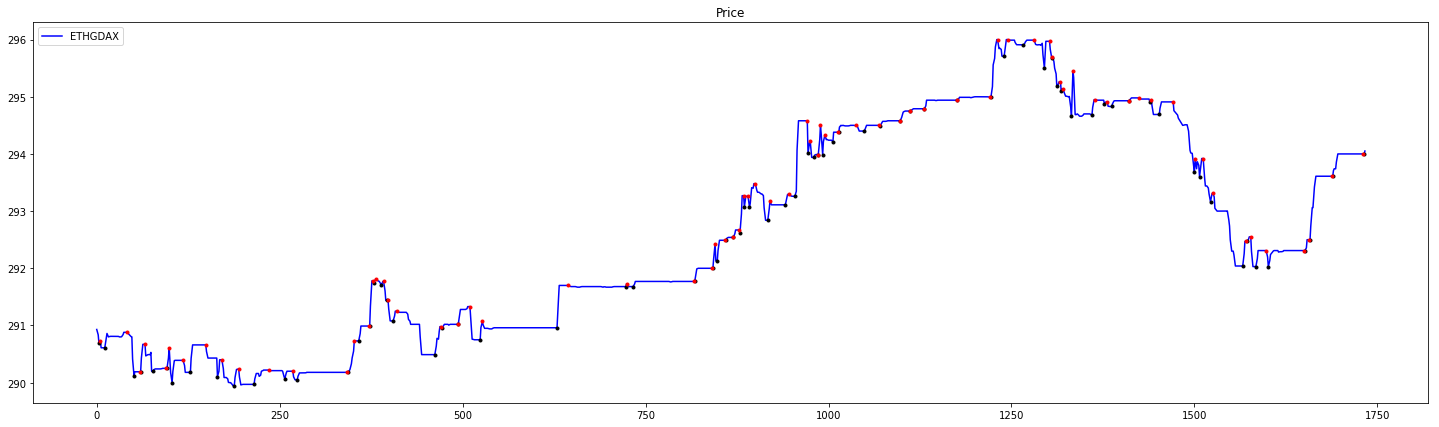

In [34]:
plt.figure(figsize=(25,7))
plt.plot(gdaxArray,label='ETHGDAX',color='b')
plt.plot(valleys, gdaxArray[valleys],linestyle='',marker='o',markersize=3,color='black')
plt.plot(FinalPeakArray, gdaxArray[FinalPeakArray],linestyle='',marker='o',markersize=3,color='red')

plt.title('Price')
plt.legend(loc='upper left')
plt.show()

In [319]:
peakprice = 0
price = 1
peaks = []
testarray = [2,2,2,3,4,4,3,2,1,1,2,3]
for index, price in enumerate(testarray, start=1):
    #print(price, testarray[index-2])
    print(testarray[peaks[-1]])
    if price > testarray[index-2]:
        peakprice = price
        peakpos = index
    if price == testarray[index-2]:
        #if peakprice != (testarray[peaks[-1:]]):
        peaks.append(peakpos)

#print("position {}: {}".format(peakpos, peak))
#peaks


IndexError: list index out of range